In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread, mmwrite

In [21]:
projdir = '/u/home/t/terencew/project-cluo/demux_benchmark/adelus_2023/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'demuxalot']
atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'scavengers']

con_cols = ['C1', 'C2', 'I1', 'I2']

In [22]:
gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t',
                  header=0, index_col=0)
atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t',
                   header=0, index_col=0)
gex.shape, atac.shape

gex['sample'] = [x.split('_')[1] for x in gex.index]
atac['sample'] = [x.split('_')[1] for x in atac.index]

# gex = gex.drop(columns=['sample', 'ambimux'])
# atac = atac.drop(columns=['sample', 'ambimux'])
gex.shape, atac.shape

((35201, 10), (35201, 10))

In [24]:
!ls {projdir}/csv/var_consistency/ge

ls: cannot access /u/home/t/terencew/project-cluo/demux_benchmark/adelus_2023//csv/var_consistency/ge: No such file or directory


In [25]:
cov = 20
indir = f'{projdir}/csv/var_consistency/gex/{s}'

gex_con = pd.DataFrame(index=gex_methods, columns=con_cols)
method = 'vireo'
tmp_con = pd.read_csv(f'{indir}/{method}_cov{cov}_varcon.csv', sep='\t',
                      header=0, index_col=0)
tmp_con

,C1,C2,I1,I2,donor
AAACAGCCACACAATT-1_ctrl6h,6,427,35,0,D120.rep0.uD562_D120.rep0.uD562
AAACGGATCGCTAGTG-1_ctrl6h,3,229,20,0,D120.rep0.uD562_D120.rep0.uD562
AAAGCACCAGATTCAT-1_ctrl6h,2,229,13,0,D120.rep0.uD562_D120.rep0.uD562
AACAAAGGTTAGTACG-1_ctrl6h,8,303,30,0,D120.rep0.uD562_D120.rep0.uD562
AACAAAGGTTGGATAT-1_ctrl6h,1,239,18,0,D120.rep0.uD562_D120.rep0.uD562
...,...,...,...,...,...
TTTCCACCACAAGCCT-1_ctrl6h,1,60,13,0,V101.rep0.uD22_V101.rep0.uD22
TTTGACCGTACGGTAC-1_ctrl6h,5,225,10,0,V101.rep0.uD22_V101.rep0.uD22
TTTGCGACAACTGGGA-1_ctrl6h,18,505,37,0,V101.rep0.uD22_V101.rep0.uD22
TTTGGCTGTGGAGCAA-1_ctrl6h,3,385,72,0,V101.rep0.uD22_V101.rep0.uD22


In [26]:
def process_con(con):
    con['DP'] = np.sum(con.iloc[:,:4], axis=1)
    con['Consistent rate'] = (con['C1'] + con['C2']) / con['DP']
    con['Inconsistent rate'] = 1 - con['Consistent rate']
    con['C1 rate'] = con['C1'] / con['DP']
    con['C2 rate'] = con['C2'] / con['DP']
    con['I1 rate'] = con['I1'] / con['DP']
    con['I2 rate'] = con['I2'] / con['DP']
    return con

In [27]:
tmp_con = process_con(tmp_con)

In [28]:
melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']
melt_con = tmp_con.melt(id_vars='donor', value_vars=melt_cols)
melt_con

,donor,variable,value
0,D120.rep0.uD562_D120.rep0.uD562,C1 rate,0.012821
1,D120.rep0.uD562_D120.rep0.uD562,C1 rate,0.011905
2,D120.rep0.uD562_D120.rep0.uD562,C1 rate,0.008197
3,D120.rep0.uD562_D120.rep0.uD562,C1 rate,0.023460
4,D120.rep0.uD562_D120.rep0.uD562,C1 rate,0.003876
...,...,...,...
10567,V101.rep0.uD22_V101.rep0.uD22,I2 rate,0.000000
10568,V101.rep0.uD22_V101.rep0.uD22,I2 rate,0.000000
10569,V101.rep0.uD22_V101.rep0.uD22,I2 rate,0.000000
10570,V101.rep0.uD22_V101.rep0.uD22,I2 rate,0.000000


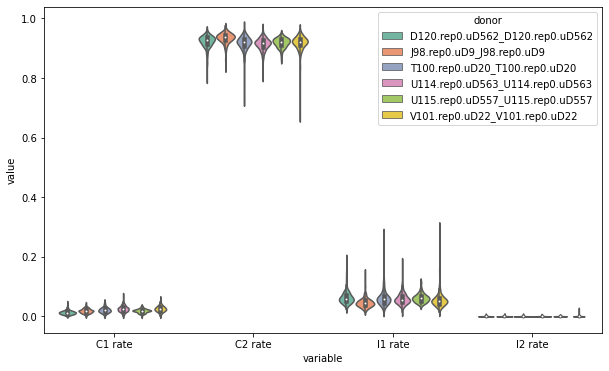

In [29]:
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')

ax = sns.violinplot(melt_con, x='variable', y='value', hue='donor')
ax.grid(False)

demuxlet
freemuxlet
vireo
vireo_nogenos
scsplit
scsplit_nogenos
souporcell
souporcell_nogenos
demuxalot


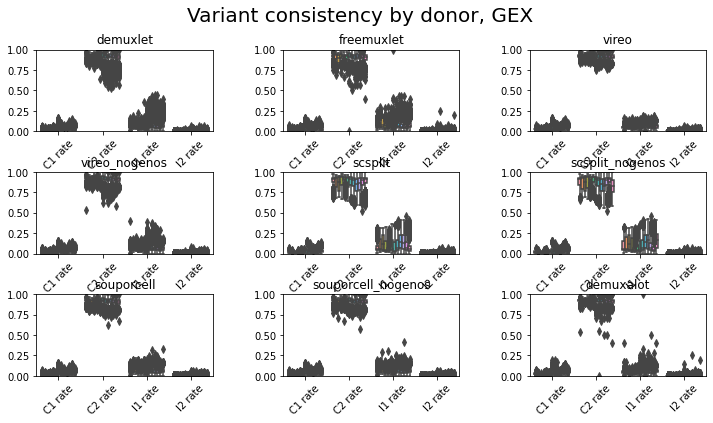

In [38]:
### plot for all figures

fig, axes = plt.subplots(3, 3, figsize=(12, 6))
cov = 20
indir = f'{projdir}/csv/var_consistency/gex/merged/'
melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']

merged_gex_con = pd.DataFrame()

gex_con = pd.DataFrame(index=gex_methods, columns=con_cols)
for i, ax in enumerate(axes.flatten()):
    if i < 10:
        method = gex_methods[i]
        print(method)
        tmp_con = pd.read_csv(f'{indir}/{method}_cov{cov}_varcon.csv', sep='\t',
                              header=0, index_col=0)
        tmp_con = process_con(tmp_con)
        melt_con = tmp_con.melt(id_vars='donor', value_vars=melt_cols)
        sns.boxplot(melt_con, x='variable', y='value', hue='donor', ax=ax)
        
        melt_con['method'] = method
        merged_gex_con = pd.concat([merged_gex_con, melt_con])
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.legend_.remove()
        ax.set_ylim(0, 1)
        ax.set_title(f'{method}', fontsize=12)
        ax.grid(False)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        ax.remove()
        
plt.suptitle('Variant consistency by donor, GEX', fontsize=20)
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Adjust the value as needed
    

demuxlet
freemuxlet
vireo
vireo_nogenos
scsplit
scsplit_nogenos
souporcell
souporcell_nogenos
scavengers


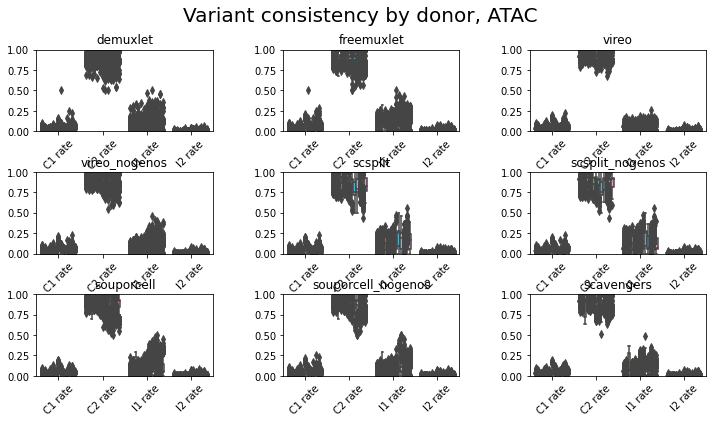

In [39]:
### plot for all figures

fig, axes = plt.subplots(3, 3, figsize=(12, 6))
cov = 20
indir = f'{projdir}/csv/var_consistency/atac/merged/'
melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']

merged_atac_con = pd.DataFrame()

atac_con = pd.DataFrame(index=atac_methods, columns=con_cols)
for i, ax in enumerate(axes.flatten()):
    if i < 10:
        method = atac_methods[i]
        print(method)
        tmp_con = pd.read_csv(f'{indir}/{method}_cov{cov}_varcon.csv', sep='\t',
                              header=0, index_col=0)
        tmp_con = process_con(tmp_con)
        melt_con = tmp_con.melt(id_vars='donor', value_vars=melt_cols)
        sns.boxplot(melt_con, x='variable', y='value', hue='donor', ax=ax)
        
        melt_con['method'] = method
        merged_atac_con = pd.concat([merged_atac_con, melt_con])
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.legend_.remove()
        ax.set_ylim(0, 1)
        ax.set_title(f'{method}', fontsize=12)
        ax.grid(False)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        ax.remove()
        
plt.suptitle('Variant consistency by donor, ATAC', fontsize=20)
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Adjust the value as needed
    

In [40]:
merged_gex_con['donor'].unique(), merged_gex_con['donor'].unique().shape

(array(['U114.rep0.uD563_U114.rep0.uD563',
        'D120.rep0.uD562_D120.rep0.uD562',
        'U115.rep0.uD557_U115.rep0.uD557', 'J98.rep0.uD9_J98.rep0.uD9',
        'V101.rep0.uD22_V101.rep0.uD22', 'T100.rep0.uD20_T100.rep0.uD20',
        'TELOS', 'U114.rep0.uD563', 'J76.rep2.uD52', 'M103.rep0.uD62',
        'V105.rep1.uD60', 'J98.rep0.uD9', 'D120.rep0.uD562'], dtype=object),
 (13,))

In [41]:
replace_dict = {'U114.rep0.uD563_U114.rep0.uD563' : 'U114.rep0.uD563',
               'D120.rep0.uD562_D120.rep0.uD562' : 'D120.rep0.uD562',
               'J98.rep0.uD9_J98.rep0.uD9' : 'J98.rep0.uD9'}

In [42]:
final_gex_con = merged_gex_con.copy()
final_atac_con = merged_atac_con.copy()

final_gex_con.replace(replace_dict, inplace=True)
final_atac_con.replace(replace_dict, inplace=True)

final_gex_con['donor'].unique().shape

(10,)

In [43]:
# merged_gex_con.to_csv(f'{projdir}/csv/final_figures/figure6/figure_s12_varcon_donors_gex.csv',
#                        sep='\t', header=True, index=True)
# merged_atac_con.to_csv(f'{projdir}/csv/final_figures/figure6/figure_s12_varcon_donors_atac.csv',
#                        sep='\t', header=True, index=True)

In [44]:
final_gex_con.to_csv(f'{projdir}/csv/final_figures/figure6/figure_s12_varcon_donors_gex.csv',
                       sep='\t', header=True, index=True)
final_atac_con.to_csv(f'{projdir}/csv/final_figures/figure6/figure_s12_varcon_donors_atac.csv',
                       sep='\t', header=True, index=True)

In [45]:
final_gex_con['method'].value_counts(), \
final_atac_con['method'].value_counts()

(freemuxlet            140336
 souporcell            130004
 souporcell_nogenos    129672
 vireo_nogenos         126180
 scsplit               125948
 scsplit_nogenos       125252
 vireo                 120572
 demuxalot             117216
 demuxlet               99836
 Name: method, dtype: int64,
 freemuxlet            140664
 scsplit_nogenos       132220
 souporcell_nogenos    131968
 scsplit               131620
 scavengers            128212
 souporcell            125840
 vireo_nogenos         123684
 vireo                 123472
 demuxlet              116908
 Name: method, dtype: int64)